✅ Columns loaded: ['ID', 'TRL_TITL', 'TRIAL_ID', 'ENTRYNO', 'ENTRY', 'COUNTRY', 'LOCATION', 'DESCRIPTION', 'LONGITUDE', 'LATITUDE', 'AEZONE', 'YEAR', 'YIELD', 'YIELD2', 'DY_SK', 'PL_HT', 'E_HT', 'ASI', 'P_ASP', 'P_HARV', 'E_HARV', 'E_ASP', 'GWT', '1000GWT', 'HUSK', 'RL', 'RLPER', 'SL', 'SLPER', 'E_ROT', 'RUST', 'BLIGHT', 'CURV', 'DIPLODIA', 'DM', 'ANTHESIS', 'STALK_ROT', 'STREAK', 'INSECT', 'MOIST', 'COBDAMCO', 'COBDAMRT', 'DEADHEART', 'SBDAMAT', 'BORERDMRAT', 'GLS', 'GTEXT', 'PLST']
✅ Using 'BLIGHT' as target column.


C:\Users\pc\AppData\Local\Temp\ipykernel_17444\200134741.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(numeric_only=True), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_17444\200134741.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_17444\200134741.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("Unknown", inpla


📊 Model Evaluation:
✅ Random Forest R² Score: -0.125
✅ Gradient Boosting R² Score: -0.742
📉 Mean Squared Error (RF): 1.032
📉 Mean Squared Error (GB): 1.599


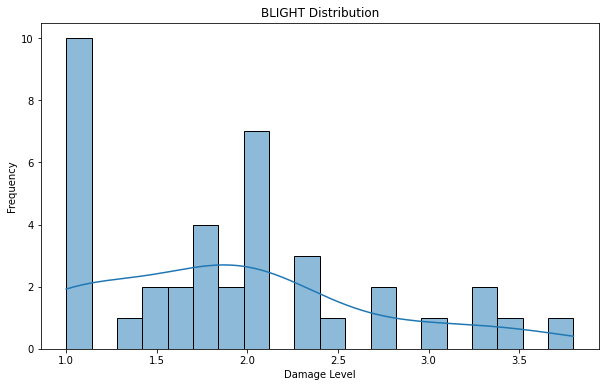

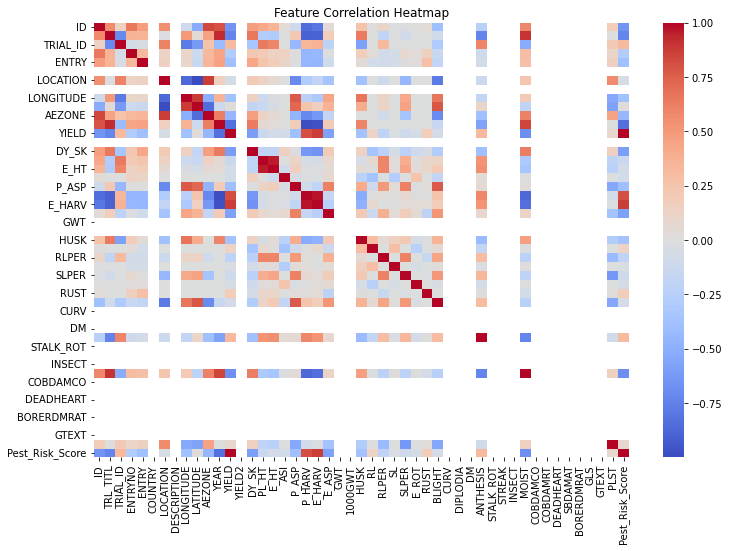

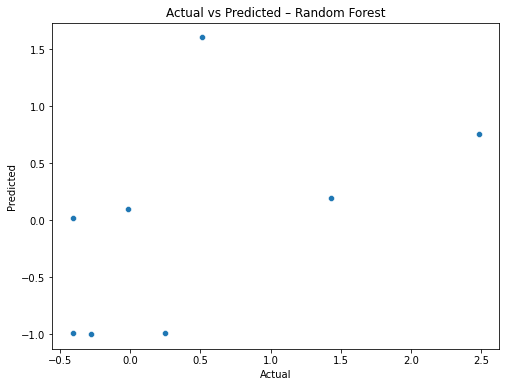


✅ Cleaned dataset saved to: C:\Users\pc\Downloads\cleaned_maize_data.csv


In [19]:
# 📘 Pest Control in Maize Crops – Zambia
# Capstone Project: Introduction to Big Data Analytics
# Author: Tracy

# 🔹 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 2. Load Dataset
original_path = r"C:\Users\pc\Downloads\international_maize_trial_regular_zambia.csv"
df = pd.read_csv(original_path)
df.columns = df.columns.str.strip()
print("✅ Columns loaded:", df.columns.tolist())

# 🔹 3. Select Valid Target Column
pest_candidates = ['INSECT', 'COBDAMRT', 'COBDAMCO', 'DEADHEART', 'BORERDMRAT', 'STALK_ROT', 'BLIGHT', 'RUST', 'GLS']
valid_targets = [col for col in pest_candidates if col in df.columns and df[col].notna().sum() > 0]

if not valid_targets:
    raise ValueError("❌ No valid pest-related target column found.")
target_col = valid_targets[0]
print(f"✅ Using '{target_col}' as target column.")

# 🔹 4. Data Cleaning
def clean_data(df, target):
    df = df[df[target].notna()]
    if df.empty:
        raise ValueError(f"❌ All rows were dropped after filtering '{target}' values.")
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df.fillna("Unknown", inplace=True)
    return df

df = clean_data(df, target_col)

# 🔹 5. Encode Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 🔹 6. Create Pest Risk Score
risk_cols = ['MOIST', 'DY_SK', 'YIELD']
if all(col in df.columns for col in risk_cols):
    def pest_risk_score(row):
        return row['MOIST'] * 0.3 + row['DY_SK'] * 0.4 + row['YIELD'] * 0.3
    df['Pest_Risk_Score'] = df.apply(pest_risk_score, axis=1)
else:
    print("❌ Missing columns for Pest Risk Score:", risk_cols)

# 🔹 7. Scale Features for Modeling
scaled_df = df.copy()
scaler = StandardScaler()
scaled_df[scaled_df.columns] = scaler.fit_transform(scaled_df[scaled_df.columns])

# 🔹 8. Model Training & Evaluation
X = scaled_df.drop(target_col, axis=1)
y = scaled_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# 🔹 9. Evaluation Metrics
rf_r2 = r2_score(y_test, y_pred_rf)
gb_r2 = r2_score(y_test, y_pred_gb)
rf_mse = mean_squared_error(y_test, y_pred_rf)
gb_mse = mean_squared_error(y_test, y_pred_gb)

print("\n📊 Model Evaluation:")
print(f"✅ Random Forest R² Score: {rf_r2:.3f}")
print(f"✅ Gradient Boosting R² Score: {gb_r2:.3f}")
print(f"📉 Mean Squared Error (RF): {rf_mse:.3f}")
print(f"📉 Mean Squared Error (GB): {gb_mse:.3f}")

# 🔹 10. Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df[target_col], bins=20, kde=True)
plt.title(f"{target_col} Distribution")
plt.xlabel("Damage Level")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title("Actual vs Predicted – Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# 🔹 11. Export Cleaned Dataset to Same Folder
folder_path = os.path.dirname(original_path)
cleaned_file_path = os.path.join(folder_path, "cleaned_maize_data.csv")

df.to_csv(cleaned_file_path, index=False)
print(f"\n✅ Cleaned dataset saved to: {cleaned_file_path}")